<a href="https://colab.research.google.com/github/gerardovazquez29/ciencia_datos/blob/main/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = "/content/drive/MyDrive/analisisDatos/ventas_electronica_practica.xlsx"
df = pd.read_excel(ruta)
df

,ID_Transaccion,Fecha,Producto,Categoria,Precio_Unitario,Cantidad,Total,Cliente_Email
0,1000,2023-12-09,Mouse Inalámbrico,Accesorios,25.0,4,100.0,cliente0@ejemplo.com
1,1001,2023-07-19,Mouse Inalámbrico,Accesorios,25.0,4,100.0,cliente1@ejemplo.com
2,1002,2023-09-01,Cable HDMI,NaN,10.0,2,20.0,cliente2@ejemplo.com
3,1003,2023-12-28,Cable HDMI,Cables,10.0,4,40.0,cliente3@ejemplo.com
4,1004,2023-03-20,Mouse Inalámbrico,Accesorios,25.0,5,125.0,cliente4@ejemplo.com
...,...,...,...,...,...,...,...,...
98,1098,2023-12-14,Teclado Mecánico,Accesorios,80.0,3,240.0,cliente_sin_arroba.com
99,1099,2023-11-17,Auriculares BT,audio,60.0,4,240.0,cliente99@ejemplo.com
100,1000,2023-12-09,Mouse Inalámbrico,Accesorios,25.0,4,100.0,cliente0@ejemplo.com
101,1001,2023-07-19,Mouse Inalámbrico,Accesorios,25.0,4,100.0,cliente1@ejemplo.com


In [ ]:
print("---REPORTE INICIAL---")
print(f"Cantidad de filas: {df.shape[0]}")
print(f"Cantidad de columnas: {df.shape[1]}")
print(f"Duplicados encontrados: {df.duplicated().sum()}")
print("\nValores nulos encontrados:")
print({df.isnull().sum().sum()})

---REPORTE INICIAL---
Cantidad de filas: 103
Cantidad de columnas: 8
Duplicados encontrados: 3

Valores nulos encontrados:
{np.int64(11)}


In [ ]:
df_clean = df.drop_duplicates()
df_clean

,ID_Transaccion,Fecha,Producto,Categoria,Precio_Unitario,Cantidad,Total,Cliente_Email
0,1000,2023-12-09,Mouse Inalámbrico,Accesorios,25.0,4,100.0,cliente0@ejemplo.com
1,1001,2023-07-19,Mouse Inalámbrico,Accesorios,25.0,4,100.0,cliente1@ejemplo.com
2,1002,2023-09-01,Cable HDMI,NaN,10.0,2,20.0,cliente2@ejemplo.com
3,1003,2023-12-28,Cable HDMI,Cables,10.0,4,40.0,cliente3@ejemplo.com
4,1004,2023-03-20,Mouse Inalámbrico,Accesorios,25.0,5,125.0,cliente4@ejemplo.com
...,...,...,...,...,...,...,...,...
95,1095,2023-07-31,Mouse Inalámbrico,Accesorios,25.0,4,100.0,cliente95@ejemplo.com
96,1096,2023-02-22,Cable HDMI,NaN,10.0,3,30.0,cliente96@ejemplo.com
97,1097,2023-06-02,"Monitor 24""",Computación,150.0,1,150.0,cliente97@ejemplo.com
98,1098,2023-12-14,Teclado Mecánico,Accesorios,80.0,3,240.0,cliente_sin_arroba.com


In [ ]:
df_clean['Precio_Unitario'] = df_clean.groupby('Producto')['Precio_Unitario'].transform(lambda x: x.fillna(x.mean()))

/tmp/ipython-input-471806067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Precio_Unitario'] = df_clean.groupby('Producto')['Precio_Unitario'].transform(lambda x: x.fillna(x.mean()))


In [ ]:
df_clean['Categoria'] = df_clean.groupby('Producto')['Categoria'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconosido"))

/tmp/ipython-input-1443745485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Categoria'] = df_clean.groupby('Producto')['Categoria'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconosido"))


In [ ]:
df_clean['Total'] = df_clean['Precio_Unitario'] * df_clean['Cantidad']

/tmp/ipython-input-4171308127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Total'] = df_clean['Precio_Unitario'] * df_clean['Cantidad']


In [ ]:
df_clean['Categoria']= df_clean['Categoria'].str.title()

/tmp/ipython-input-1454314100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Categoria']= df_clean['Categoria'].str.title()


In [ ]:
negativos = df_clean[df_clean['Cantidad'] < 0].shape[0]
df_clean['Cantidad'] = df_clean['Cantidad'].abs()

/tmp/ipython-input-3184726864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cantidad'] = df_clean['Cantidad'].abs()


In [ ]:
df_clean['Total'] = df_clean['Precio_Unitario'] * df_clean['Cantidad']

/tmp/ipython-input-4171308127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Total'] = df_clean['Precio_Unitario'] * df_clean['Cantidad']


In [ ]:
print("\n--- REPORTE FINAL (LIMPIO) ---")
print(f"Dimensiones finales: {df_clean.shape}")
print(f"Filas duplicadas eliminadas: {df.shape[0] - df_clean.shape[0]}")
print(f"Cantidades negativas corregidas: {negativos}")
print("\nDatos Nulos restantes:")
print(df_clean.isnull().sum())


--- REPORTE FINAL (LIMPIO) ---
Dimensiones finales: (100, 8)
Filas duplicadas eliminadas: 3
Cantidades negativas corregidas: 0

Datos Nulos restantes:
ID_Transaccion     0
Fecha              0
Producto           0
Categoria          0
Precio_Unitario    0
Cantidad           0
Total              0
Cliente_Email      0
dtype: int64


In [ ]:
print("\nPrimeras 5 filas limpias:")
print(df_clean.head().to_markdown(index=False, numalign="left", stralign="left"))


Primeras 5 filas limpias:
| ID_Transaccion   | Fecha      | Producto          | Categoria   | Precio_Unitario   | Cantidad   | Total   | Cliente_Email        |
|:-----------------|:-----------|:------------------|:------------|:------------------|:-----------|:--------|:---------------------|
| 1000             | 2023-12-09 | Mouse Inalámbrico | Accesorios  | 25                | 4          | 100     | cliente0@ejemplo.com |
| 1001             | 2023-07-19 | Mouse Inalámbrico | Accesorios  | 25                | 4          | 100     | cliente1@ejemplo.com |
| 1002             | 2023-09-01 | Cable HDMI        | Cables      | 10                | 2          | 20      | cliente2@ejemplo.com |
| 1003             | 2023-12-28 | Cable HDMI        | Cables      | 10                | 4          | 40      | cliente3@ejemplo.com |
| 1004             | 2023-03-20 | Mouse Inalámbrico | Accesorios  | 25                | 5          | 125     | cliente4@ejemplo.com |


ejemplo 2

/tmp/ipython-input-4187697718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Precio_Unitario'] = df.groupby('Producto')['Precio_Unitario'].transform(lambda x: x.fillna(x.mean()))
/tmp/ipython-input-4187697718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Categoria'] = df.groupby('Producto')['Categoria'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido"))
/tmp/ipython-input-4187697718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

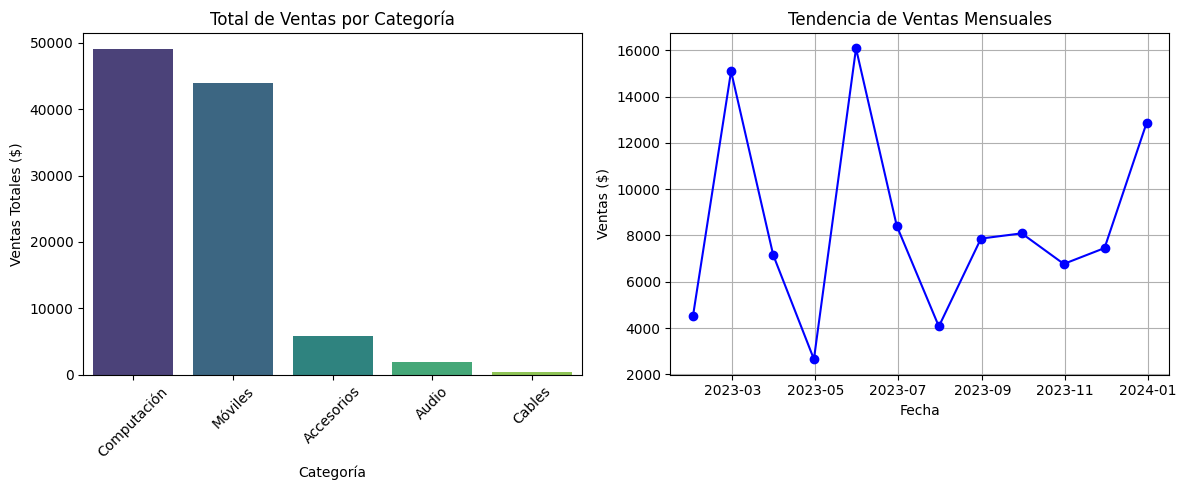

Total Vendido: $101,055.00
Mejor Categoría: Computación
Mejor Mes: May


In [ ]:

# 1. Cargar y Limpiar los datos (Repetimos la limpieza rápida para asegurar precisión)
df = df.drop_duplicates()
df['Precio_Unitario'] = df.groupby('Producto')['Precio_Unitario'].transform(lambda x: x.fillna(x.mean()))
df['Categoria'] = df.groupby('Producto')['Categoria'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido"))
df['Categoria'] = df['Categoria'].str.title()
df['Cantidad'] = df['Cantidad'].abs()
df['Total'] = df['Precio_Unitario'] * df['Cantidad']
df['Fecha'] = pd.to_datetime(df['Fecha'])

# 2. Análisis por Categoría
ventas_por_categoria = df.groupby('Categoria')['Total'].sum().sort_values(ascending=False)

# 3. Análisis Temporal (Mensual)
# Agrupamos por mes (M) y sumamos
ventas_mensuales = df.set_index('Fecha').resample('M')['Total'].sum()

# 4. Generación de Gráficos
plt.figure(figsize=(12, 5))

# Gráfico 1: Ventas por Categoría (Barras)
plt.subplot(1, 2, 1)
sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette="viridis")
plt.title('Total de Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)

# Gráfico 2: Tendencia Mensual (Línea)
plt.subplot(1, 2, 2)
plt.plot(ventas_mensuales.index, ventas_mensuales.values, marker='o', linestyle='-', color='b')
plt.title('Tendencia de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Cálculos rápidos para el texto
total_vendido = df['Total'].sum()
mejor_mes = ventas_mensuales.idxmax().strftime('%B')
mejor_categoria = ventas_por_categoria.index[0]

print(f"Total Vendido: ${total_vendido:,.2f}")
print(f"Mejor Categoría: {mejor_categoria}")
print(f"Mejor Mes: {mejor_mes}")